Accuracy: 0.96

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



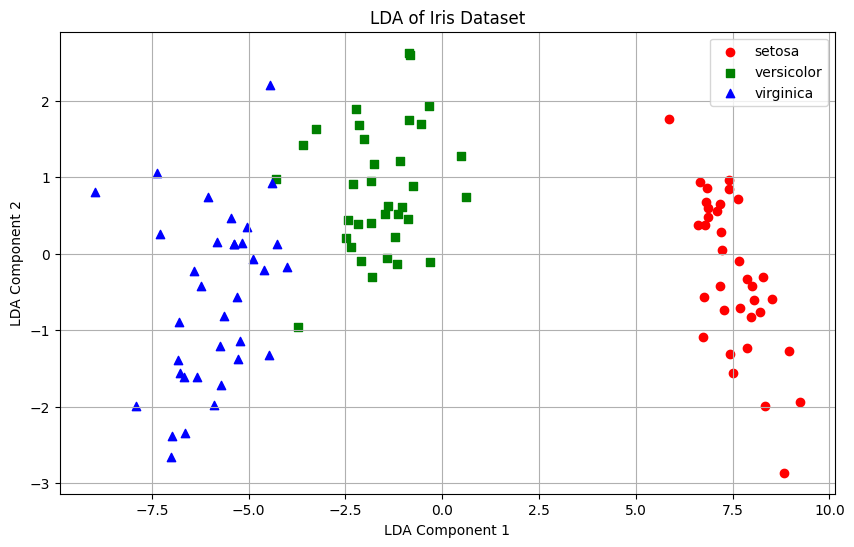

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data (important for LDA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LDA for dimensionality reduction (to 2 components)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Train a classifier (K-Nearest Neighbors) on the LDA-transformed data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

# Visualize the LDA-transformed data
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
markers = ['o', 's', '^']
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1],
                color=colors[i], marker=markers[i], label=target_name)

plt.title('LDA of Iris Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(loc='best')
plt.grid()
plt.show()
